In [51]:
import numpy as np
import matplotlib.pyplot as plt

import random

from numpy import cos, pi, sqrt
from mpl_toolkits.mplot3d import Axes3D

In [52]:
def mutual_inductance(R1, R2, d=0, N=360, K=360):
    df1 = 2 * pi / N
    df2 = 2 * pi / K
    M = 0
    for n in range(N):
        for k in range(K):
            r12 = (R1 ** 2 + R2 ** 2 - 2 * R1 * R2 * cos(df1 * n - df2 * k) + d ** 2)
            M += (cos(df2 * k - df1 * n) * df1 * df2) / r12 ** 0.5
    M *= R1 * R2 / (4 * pi)
    return M

def plotM(R, M, x="R2_in"):
    plt.title(f"График взаимной индуктивности M")
    plt.xlabel(f"{x}, см")
    plt.ylabel("M")
    plt.plot(R, M)

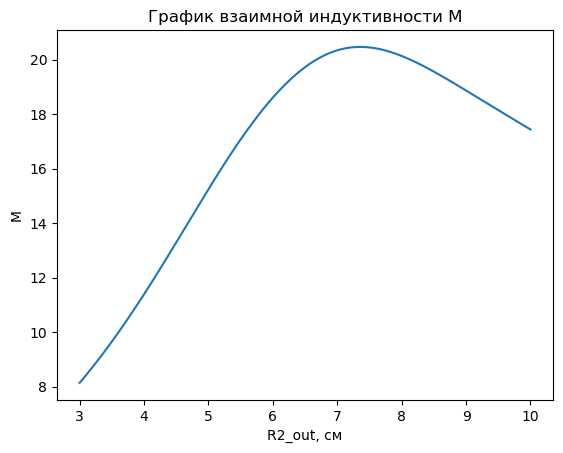

In [53]:
R1_out = 7
R1_in = 5.5
R2_out = np.linspace(3, 10, 500)
R2_in = 3
d = 2

M11 = mutual_inductance(R1_out, R2_out, d=d)
M12 = mutual_inductance(R1_out, R2_in, d=d)
M21 = mutual_inductance(R1_in, R2_out, d=d)
M22 = mutual_inductance(R1_in, R2_in, d=d)
M = M11 + M12 + M21 + M22
# print(M.shape)
# print(R2_in.shape)
plotM(R2_out, M, x="R2_out")